
# <font color='red'> <center> Challenge 1 - Unsupervised Learning </font>
# <font color='red'> <center> 17/10/2025</font>
## <font color='red'> <center> Auteurs: Astrid MARION</font>
---  
---
    

**The objective** of this challenge is to analyse a dataset and to applied an unsupervised learning algorithm.

In [5]:
# Libraries: Standard ones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Library for boxplots
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Part 1 - Data visualization and Feature engineering

In [6]:
# Load the data: spotify
spotify_origin = pd.read_csv("playlist_dataset.csv",sep=",")
spotify = spotify_origin.copy() # we work with a copy
spotify.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


COMMENT: Removal of id and url features, name features are kept in case they are needed (as labels in visualizations or for embedding)

In [ ]:
spotify = spotify.drop(spotify.columns[[0,2,6]] ,axis=1)
# verification
spotify.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [18]:
spotify.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


In [19]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2300 non-null   int64  
 1   track_name         2300 non-null   object 
 2   track_popularity   2300 non-null   int64  
 3   album              2300 non-null   object 
 4   artist_name        2300 non-null   object 
 5   artist_genres      2300 non-null   object 
 6   artist_popularity  2300 non-null   int64  
 7   danceability       2299 non-null   float64
 8   energy             2299 non-null   float64
 9   key                2299 non-null   float64
 10  loudness           2299 non-null   float64
 11  mode               2299 non-null   float64
 12  speechiness        2299 non-null   float64
 13  acousticness       2299 non-null   float64
 14  instrumentalness   2299 non-null   float64
 15  liveness           2299 non-null   float64
 16  valence            2299 

In [20]:
spotify[spotify.isna().any(axis=1)]

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
447,2004,These Words,68,Unwritten,Natasha Bedingfield,"['dance pop', 'pop', 'post-teen pop']",64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**COMMENTS :** 
There are missing values that we can remove because there is only one line

In [22]:
spotify = spotify.dropna()
#verification
pd.isnull(spotify).apply(func=sum)

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

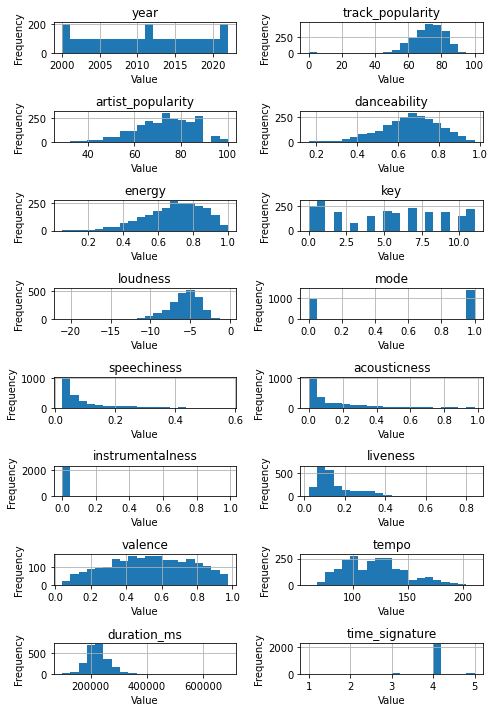

In [ ]:
# Displays the frequence of each numerical column

numerical_columns = spotify.select_dtypes(include='number').columns
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 10))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    spotify[column].hist(ax=ax, bins=20)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
for i in range(len(numerical_columns), num_rows * num_cols):
    axes[i].axis('off')
plt.tight_layout()
plt.show()


**COMMENTS:** 
 * We can see that several columns don't have a lot of variance, so we can remove them, because there are unsignificant
 * Columns have really different scales : we need to standardize them
 

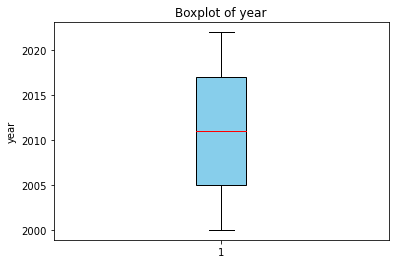

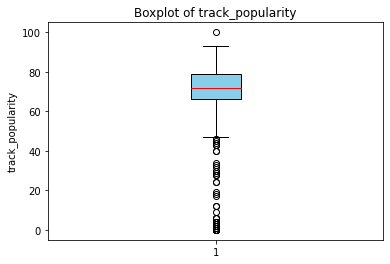

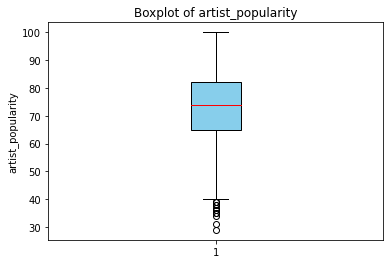

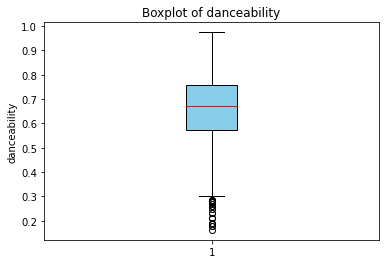

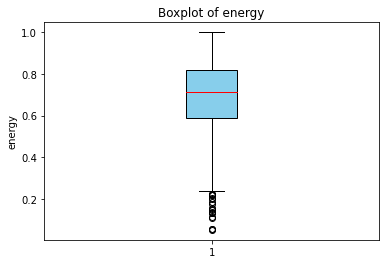

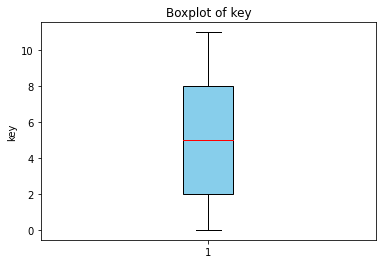

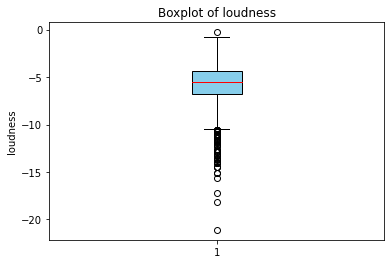

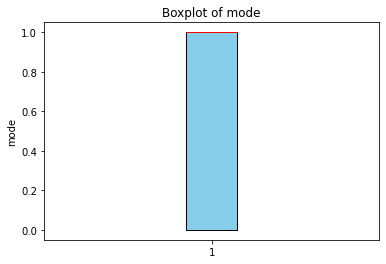

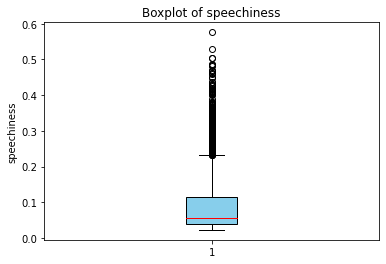

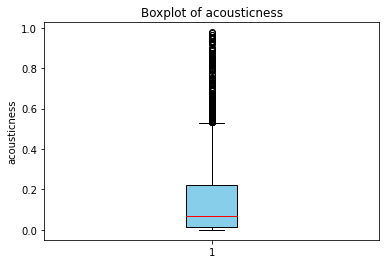

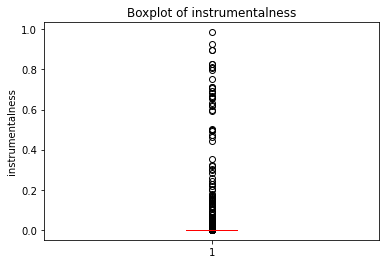

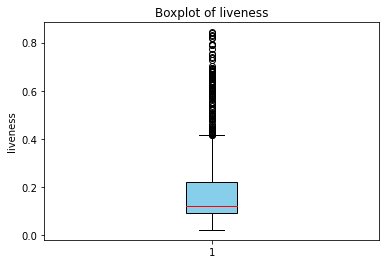

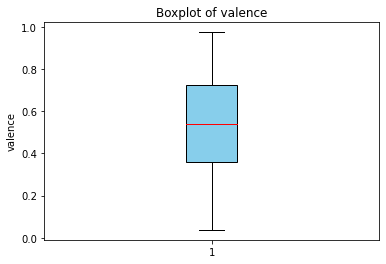

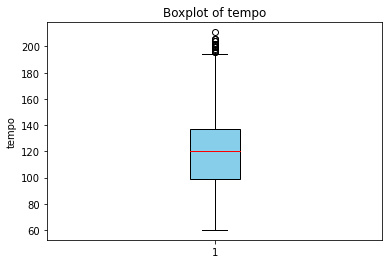

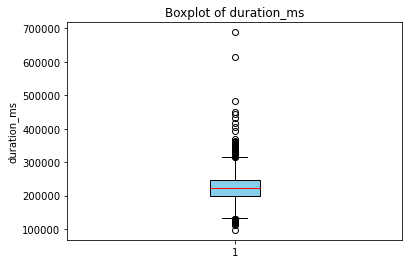

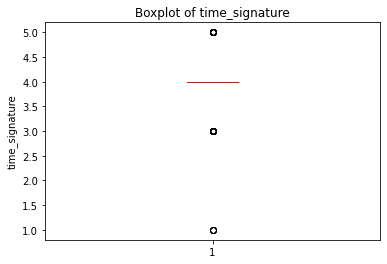

In [ ]:
numeric_cols = spotify.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    plt.figure()
    plt.boxplot(spotify[col].dropna().values, vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.show()

## Part 2 - Feature engineering